In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from xgboost import XGBClassifier
import spacy
import nltk
from sklearn.decomposition import LatentDirichletAllocation

# Data

https://archive.ics.uci.edu/dataset/380/youtube+spam+collection

In [9]:
# CLASS 1 = 'SPAM' ,  0 = HAM
df_eminem = pd.read_csv('Youtube04-Eminem.csv')
df_kp = pd.read_csv('Youtube02-KatyPerry.csv')
df_psy = pd.read_csv('Youtube01-Psy.csv')
df_lmfao = pd.read_csv('Youtube03-LMFAO.csv')
df_shakira = pd.read_csv('Youtube05-Shakira.csv')

In [6]:
df_eminem.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [8]:
df_eminem.CLASS.value_counts()

1    245
0    203
Name: CLASS, dtype: int64

In [10]:
df = pd.concat([df_eminem,df_kp,df_lmfao,df_psy,df_shakira])
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [11]:
df.shape

(1956, 5)

In [12]:
X = df['CONTENT'].values
y = df['CLASS'].values 

In [13]:
X

array(['+447935454150 lovely girl talk to me xxx\ufeff',
       'I always end up coming back to this song<br />\ufeff',
       'my sister just received over 6,500 new <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23active">#active</a> youtube views Right now. The only thing she used was pimpmyviews. com\ufeff',
       ..., 'wow', 'Shakira u are so wiredo',
       'Shakira is the best dancer'], dtype=object)

# Data Split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)
X_train.shape , X_test.shape

((1467,), (489,))

# Bag of Words

In [18]:
vect = CountVectorizer().fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [19]:
X_train_bag.shape

(1467, 3733)

In [21]:
vect.get_feature_names_out()

array(['00', '000', '02', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

# XGBClassifier

In [26]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_bag, y_train)

In [27]:
scores.mean()

0.9420631051055235

# Confusion matrix

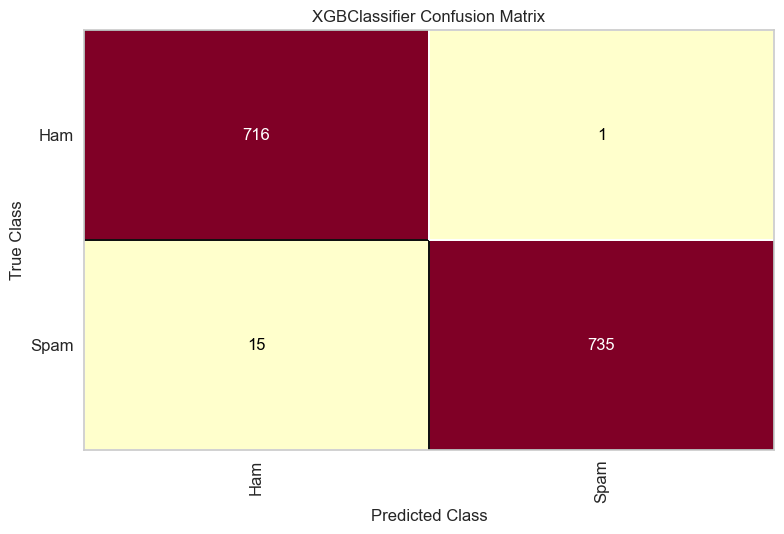

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [31]:
cm = ConfusionMatrix(xgb, classes=['Ham','Spam'])
cm.fit(X_train_bag,y_train)
cm.score(X_train_bag,y_train)
cm.show()

# Logistic Regression

In [34]:
log_reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(log_reg, X_train_bag, y_train)

In [35]:
scores.mean()

0.9434306145666456

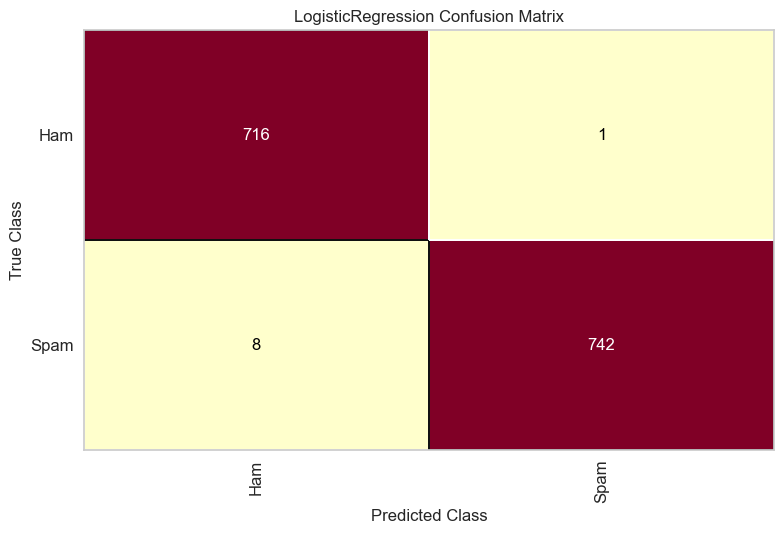

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [36]:
cm = ConfusionMatrix(log_reg, classes=['Ham','Spam'])
cm.fit(X_train_bag,y_train)
cm.score(X_train_bag,y_train)
cm.show()

# Removing Stop words

In [37]:
vect = CountVectorizer(stop_words='english').fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [38]:
X_train_bag.shape

(1467, 3512)

In [39]:
vect.get_feature_names_out()

array(['00', '000', '02', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

# XGBClassifier

In [40]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_bag, y_train)

In [41]:
scores.mean()

0.9325183998514082

# min_df

In [42]:
vect = CountVectorizer(min_df=10).fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [43]:
X_train_bag.shape

(1467, 304)

In [44]:
vect.get_feature_names_out()

array(['000', '100', '15', '2014', '2015', '39', 'about', 'ago', 'all',
       'also', 'am', 'amp', 'an', 'and', 'any', 'anyone', 'appreciate',
       'are', 'as', 'at', 'awesome', 'back', 'be', 'beautiful', 'because',
       'been', 'before', 'being', 'best', 'better', 'billion', 'boy',
       'br', 'but', 'by', 'called', 'can', 'chance', 'channel', 'check',
       'click', 'co', 'com', 'come', 'comment', 'comments', 'cool',
       'could', 'cover', 'covers', 'crazy', 'dance', 'day', 'did', 'do',
       'does', 'doing', 'don', 'dont', 'dream', 'earth', 'eminem',
       'enjoy', 'even', 'ever', 'every', 'everyday', 'everyone',
       'extraordinary', 'facebook', 'fans', 'feel', 'few', 'first',
       'follow', 'for', 'fox', 'free', 'from', 'fuck', 'fucking', 'funny',
       'gangnam', 'get', 'gets', 'getting', 'girl', 'give', 'go', 'god',
       'good', 'google', 'got', 'great', 'gt', 'guy', 'guys', 'has',
       'hate', 'have', 'he', 'hear', 'heard', 'hello', 'help', 'her',
       'he

# XGBClassifier

In [45]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_bag, y_train)

In [46]:
scores.mean()

0.9400292540224282

# max_df

In [47]:
vect = CountVectorizer(max_df=0.01).fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [48]:
X_train_bag.shape

(1467, 3513)

In [49]:
vect.get_feature_names_out()

array(['00', '02', '047000', ..., 'ｔｈｉｓ', 'ｕｓｒ', 'ｗｗｗ'], dtype=object)

# XGBClassifier

In [50]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_bag, y_train)

In [51]:
scores.mean()

0.6441549998839126

# tfidf

In [56]:
tfidf = TfidfVectorizer().fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

In [57]:
X_train_tfidf.shape

(1467, 3733)

# XGBClassifier

In [58]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_tfidf, y_train)

In [59]:
scores.mean()

0.9352650275127117

# Feature Importances

In [60]:
vect = CountVectorizer(min_df=10).fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [63]:
X_train_bag.shape

(1467, 304)

In [61]:
xgb = XGBClassifier()
xgb.fit(X_train_bag,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
f_imp = xgb.feature_importances_
f_imp

array([0.00264412, 0.        , 0.        , 0.        , 0.00124283,
       0.00109832, 0.        , 0.        , 0.00194225, 0.        ,
       0.        , 0.00566874, 0.        , 0.00272178, 0.        ,
       0.        , 0.        , 0.00196752, 0.        , 0.004716  ,
       0.        , 0.        , 0.00484205, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00236494, 0.        ,
       0.00794765, 0.        , 0.00124027, 0.00110999, 0.        ,
       0.        , 0.0042966 , 0.        , 0.04357539, 0.0455463 ,
       0.        , 0.0123476 , 0.09842573, 0.        , 0.01994626,
       0.003529  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00092944, 0.        , 0.00317388, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02304

In [65]:
f_names = vect.get_feature_names_out()
f_names.shape

(304,)

In [66]:
f_names

array(['000', '100', '15', '2014', '2015', '39', 'about', 'ago', 'all',
       'also', 'am', 'amp', 'an', 'and', 'any', 'anyone', 'appreciate',
       'are', 'as', 'at', 'awesome', 'back', 'be', 'beautiful', 'because',
       'been', 'before', 'being', 'best', 'better', 'billion', 'boy',
       'br', 'but', 'by', 'called', 'can', 'chance', 'channel', 'check',
       'click', 'co', 'com', 'come', 'comment', 'comments', 'cool',
       'could', 'cover', 'covers', 'crazy', 'dance', 'day', 'did', 'do',
       'does', 'doing', 'don', 'dont', 'dream', 'earth', 'eminem',
       'enjoy', 'even', 'ever', 'every', 'everyday', 'everyone',
       'extraordinary', 'facebook', 'fans', 'feel', 'few', 'first',
       'follow', 'for', 'fox', 'free', 'from', 'fuck', 'fucking', 'funny',
       'gangnam', 'get', 'gets', 'getting', 'girl', 'give', 'go', 'god',
       'good', 'google', 'got', 'great', 'gt', 'guy', 'guys', 'has',
       'hate', 'have', 'he', 'hear', 'heard', 'hello', 'help', 'her',
       'he

In [68]:
f_imp.argsort()

array([151, 267, 150, 152, 153, 265, 155, 157, 158, 264, 161, 162, 148,
       163, 165, 166, 168, 169, 171, 172, 173, 261, 260, 176, 177, 263,
       259, 147, 145, 277, 116, 274, 118, 273, 272, 125, 126, 127, 128,
       129, 146, 131, 133, 134, 135, 136, 137, 139, 271, 141, 142, 143,
       268, 132, 179, 258, 181, 217, 218, 219, 221, 222, 248, 224, 225,
       226, 227, 228, 216, 229, 231, 232, 233, 247, 246, 236, 237, 245,
       239, 240, 241, 230, 212, 210, 252, 182, 183, 185, 186, 188, 189,
       190, 257, 192, 193, 255, 195, 196, 197, 198, 199, 200, 201, 202,
       254, 204, 205, 206, 207, 208, 278, 279, 244, 111,  37, 293, 292,
        40, 291, 290,  43, 289,  46,  47,  48, 294,  49,  51,  52,  53,
        54,  55,  56,  58,  59,  60,  62, 287,  50,  64,  35,  31,   1,
         2,   3,   6,   7,   9,  10,  12, 300,  14,  15,  34,  16, 298,
        20,  21, 297,  23,  24,  25,  26,  27,  29, 296,  18,  65,  57,
        80,  94,  81,  82,  83,  84,  85,  86, 103, 284,  89, 10

In [70]:
sorted_features = f_names[f_imp.argsort()]
sorted_features

array(['megan', 'videos', 'mean', 'million', 'moment', 'very', 'month',
       'most', 'much', 've', 'name', 'need', 'maybe', 'never', 'nice',
       'no', 'nothing', 'now', 'off', 'old', 'omg', 'type', 'trying',
       'online', 'only', 'us', 'true', 'many', 'making', 'way', 'id',
       'was', 'im', 'want', 'wanna', 'keep', 'know', 'leave', 'lie',
       'life', 'man', 'likes', 'listen', 'little', 'live', 'll', 'lol',
       'lot', 'waka', 'lt', 'lyrics', 'made', 'view', 'link', 'our',
       'too', 'over', 'should', 'simple', 'singer', 'some', 'someone',
       'these', 'songs', 'soon', 'sorry', 'spam', 'start', 'shit',
       'started', 'stop', 'style', 'sub', 'there', 'then', 'such',
       'support', 'them', 'than', 'thank', 'thanks', 'still', 'sexy',
       'same', 'those', 'page', 'part', 'people', 'per', 'person', 'play',
       'playlist', 'today', 'plus', 'probably', 'time', 'quot', 'rap',
       'rapper', 're', 'reach', 'read', 'reading', 'real', 'tiger', 'ref',
       'reg

In [71]:
sorted_importances = f_imp[f_imp.argsort()]
sorted_importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

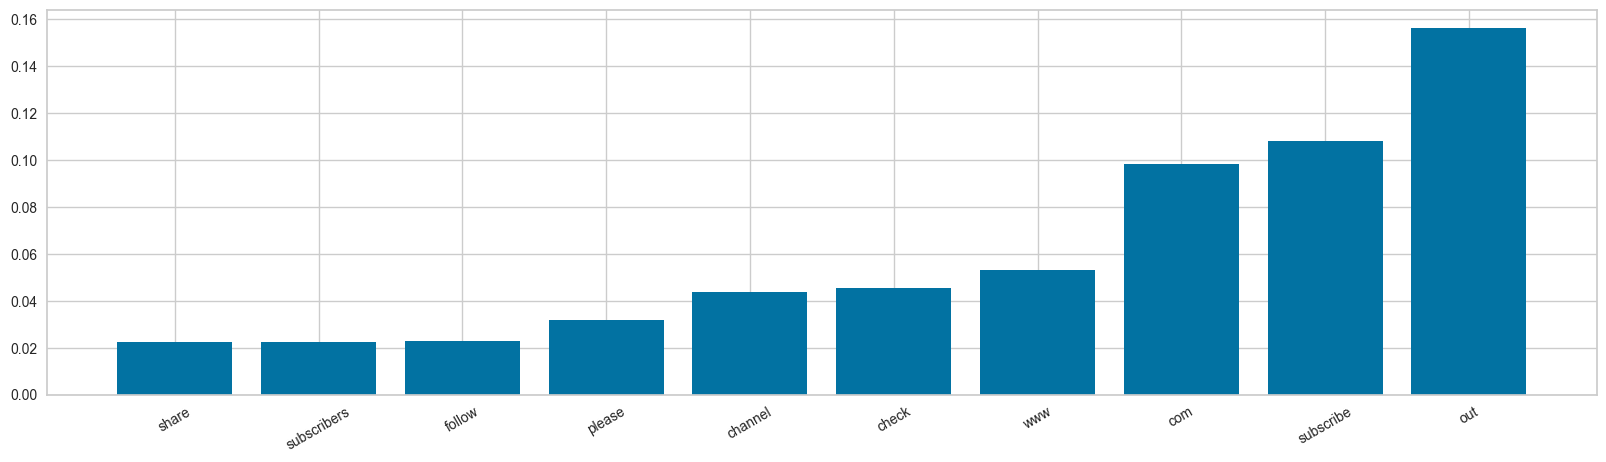

In [75]:
N = 10
plt.figure(figsize=(20,5))
plt.bar(sorted_features[-N:],sorted_importances[-N:] )
plt.xticks(rotation=30);

# n_grams

In [83]:
vect = CountVectorizer(ngram_range=(1,4)).fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [84]:
X_train_bag.shape

(1467, 46986)

In [85]:
xgb = XGBClassifier()
xgb.fit(X_train_bag,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [86]:
scores = cross_val_score(xgb,X_train_bag,y_train)
scores.mean()

0.9407118478790834

# Lemmatization

In [88]:
nlp = spacy.load('en_core_web_sm')

In [89]:
def lemma_tokenizer(text):
    return [token.lemma_ for token in nlp(text)]

In [90]:
vect = CountVectorizer(tokenizer=lemma_tokenizer).fit(X_train)
X_train_lemma = vect.transform(X_train)
X_test_lemma  = vect.transform(X_test)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [92]:
X_train_lemma.shape

(1467, 3843)

In [93]:
xgb = XGBClassifier()
xgb.fit(X_train_lemma,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [94]:
scores = cross_val_score(xgb,X_train_lemma,y_train)
scores.mean()

0.8793759141882008

# Stemming

In [96]:
stemmer = nltk.stem.PorterStemmer()

In [104]:
def stem_tokenizer(text):
    return [stemmer.stem(token.norm_.lower()) for token in nlp(text)]

In [105]:
vect = CountVectorizer(tokenizer=stem_tokenizer).fit(X_train)
X_train_stem = vect.transform(X_train)
X_test_stem  = vect.transform(X_test)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [106]:
X_train_stem.shape

(1467, 3760)

In [107]:
xgb = XGBClassifier()
xgb.fit(X_train_stem,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [108]:
scores = cross_val_score(xgb,X_train_stem,y_train)
scores.mean()

0.8848111258155139

# LDA

In [110]:
lda = LatentDirichletAllocation(n_components=10,random_state=0)


In [111]:
vect = CountVectorizer(min_df=10).fit(X_train)
X_train_bag = vect.transform(X_train)
X_test_bag  = vect.transform(X_test)

In [113]:
X_lda = lda.fit_transform(X_train_bag)

In [114]:
topics = lda.components_
topics.shape

(10, 304)

In [117]:
f_names = vect.get_feature_names_out()

In [118]:
f_names

array(['000', '100', '15', '2014', '2015', '39', 'about', 'ago', 'all',
       'also', 'am', 'amp', 'an', 'and', 'any', 'anyone', 'appreciate',
       'are', 'as', 'at', 'awesome', 'back', 'be', 'beautiful', 'because',
       'been', 'before', 'being', 'best', 'better', 'billion', 'boy',
       'br', 'but', 'by', 'called', 'can', 'chance', 'channel', 'check',
       'click', 'co', 'com', 'come', 'comment', 'comments', 'cool',
       'could', 'cover', 'covers', 'crazy', 'dance', 'day', 'did', 'do',
       'does', 'doing', 'don', 'dont', 'dream', 'earth', 'eminem',
       'enjoy', 'even', 'ever', 'every', 'everyday', 'everyone',
       'extraordinary', 'facebook', 'fans', 'feel', 'few', 'first',
       'follow', 'for', 'fox', 'free', 'from', 'fuck', 'fucking', 'funny',
       'gangnam', 'get', 'gets', 'getting', 'girl', 'give', 'go', 'god',
       'good', 'google', 'got', 'great', 'gt', 'guy', 'guys', 'has',
       'hate', 'have', 'he', 'hear', 'heard', 'hello', 'help', 'her',
       'he

In [119]:
for i in range(10):
    sorted_top = np.argsort(topics[i])
    print(f'Topic-{i}: {f_names[sorted_top[-8:]]}')

Topic-0: ['your' 'of' 'for' 'to' 'katy' 'and' 'the' 'you']
Topic-1: ['like' 'best' 'in' 'is' 'love' 'the' 'this' 'song']
Topic-2: ['gt' 'million' 'like' 'share' 'rihanna' 'up' 'it' 'br']
Topic-3: ['thanks' 'please' 'quot' 'channel' 'new' 'my' 'check' 'out']
Topic-4: ['playlist' 'amp' 'check' 'out' 'video' 'this' 'youtube' 'on']
Topic-5: ['we' 'be' 'views' 'and' 'just' 'of' 'the' 'to']
Topic-6: ['so' 'it' 'the' 'my' '39' 'to' 'and' 'you']
Topic-7: ['beautiful' 'music' 'this' 'her' 'are' 'that' 'she' 'is']
Topic-8: ['it' 'if' 'and' 'me' 'my' 'to' 'you' 'subscribe']
Topic-9: ['you' 'amp' 'and' 'https' 'http' 'www' 'the' 'com']


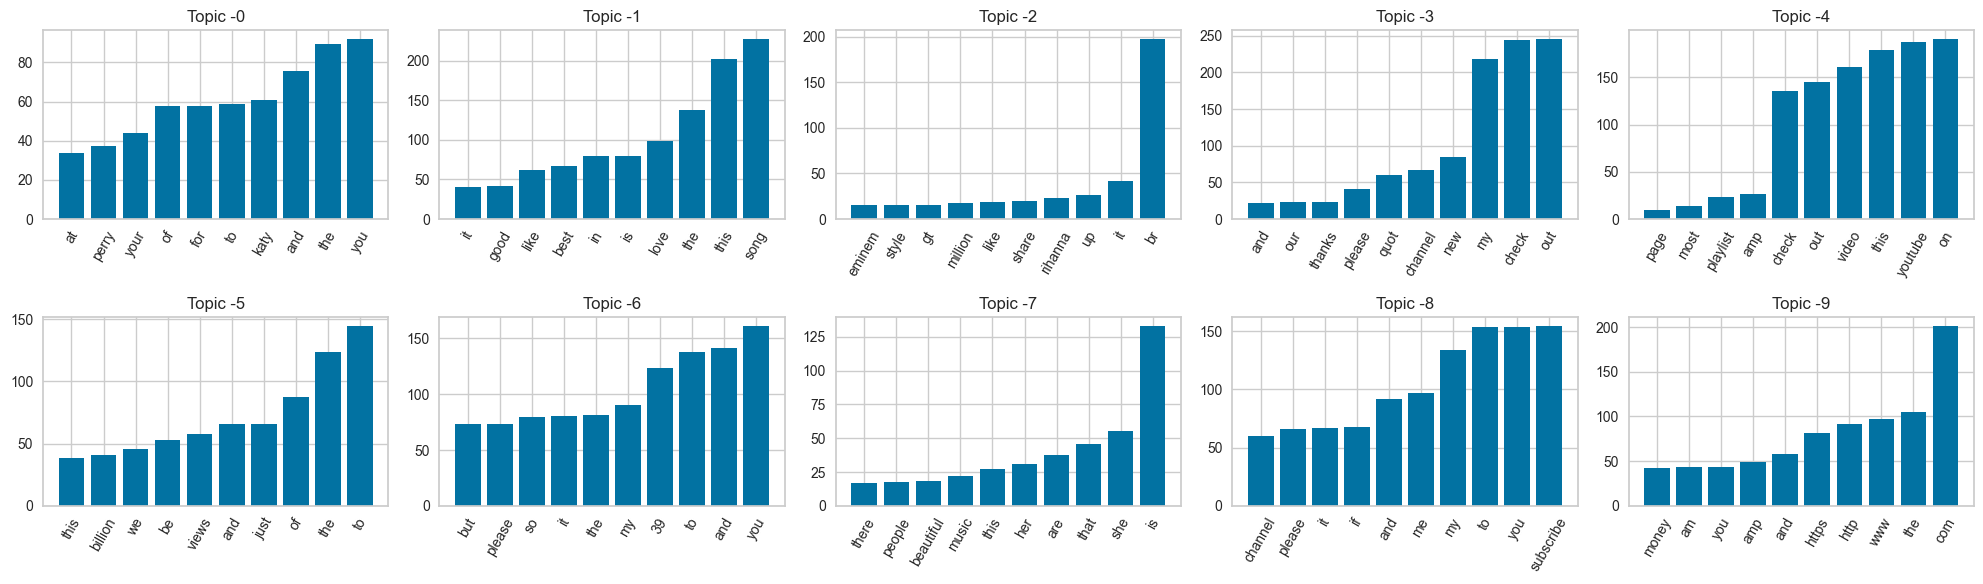

In [120]:
plt.figure(figsize=(20,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f'Topic -{i}')
    sorted_top = np.argsort(topics[i])
    plt.bar(f_names[sorted_top[-10:]], topics[i][sorted_top[-10:]] )
    plt.xticks(rotation=60)
plt.tight_layout();